In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import soundfile as sf

In [12]:
def mt_fft(sig, N_fft, Fs):

    X_fft = X_fft = np.fft.fft(sig, n=N_fft)
    freqs = np.fft.fftfreq(N_fft, 1/Fs)

    # only use the positive frequencies
    half_n = N_fft // 2
    X_fft = X_fft[:half_n]
    freqs = freqs[:half_n]

    return X_fft, freqs


# timpani

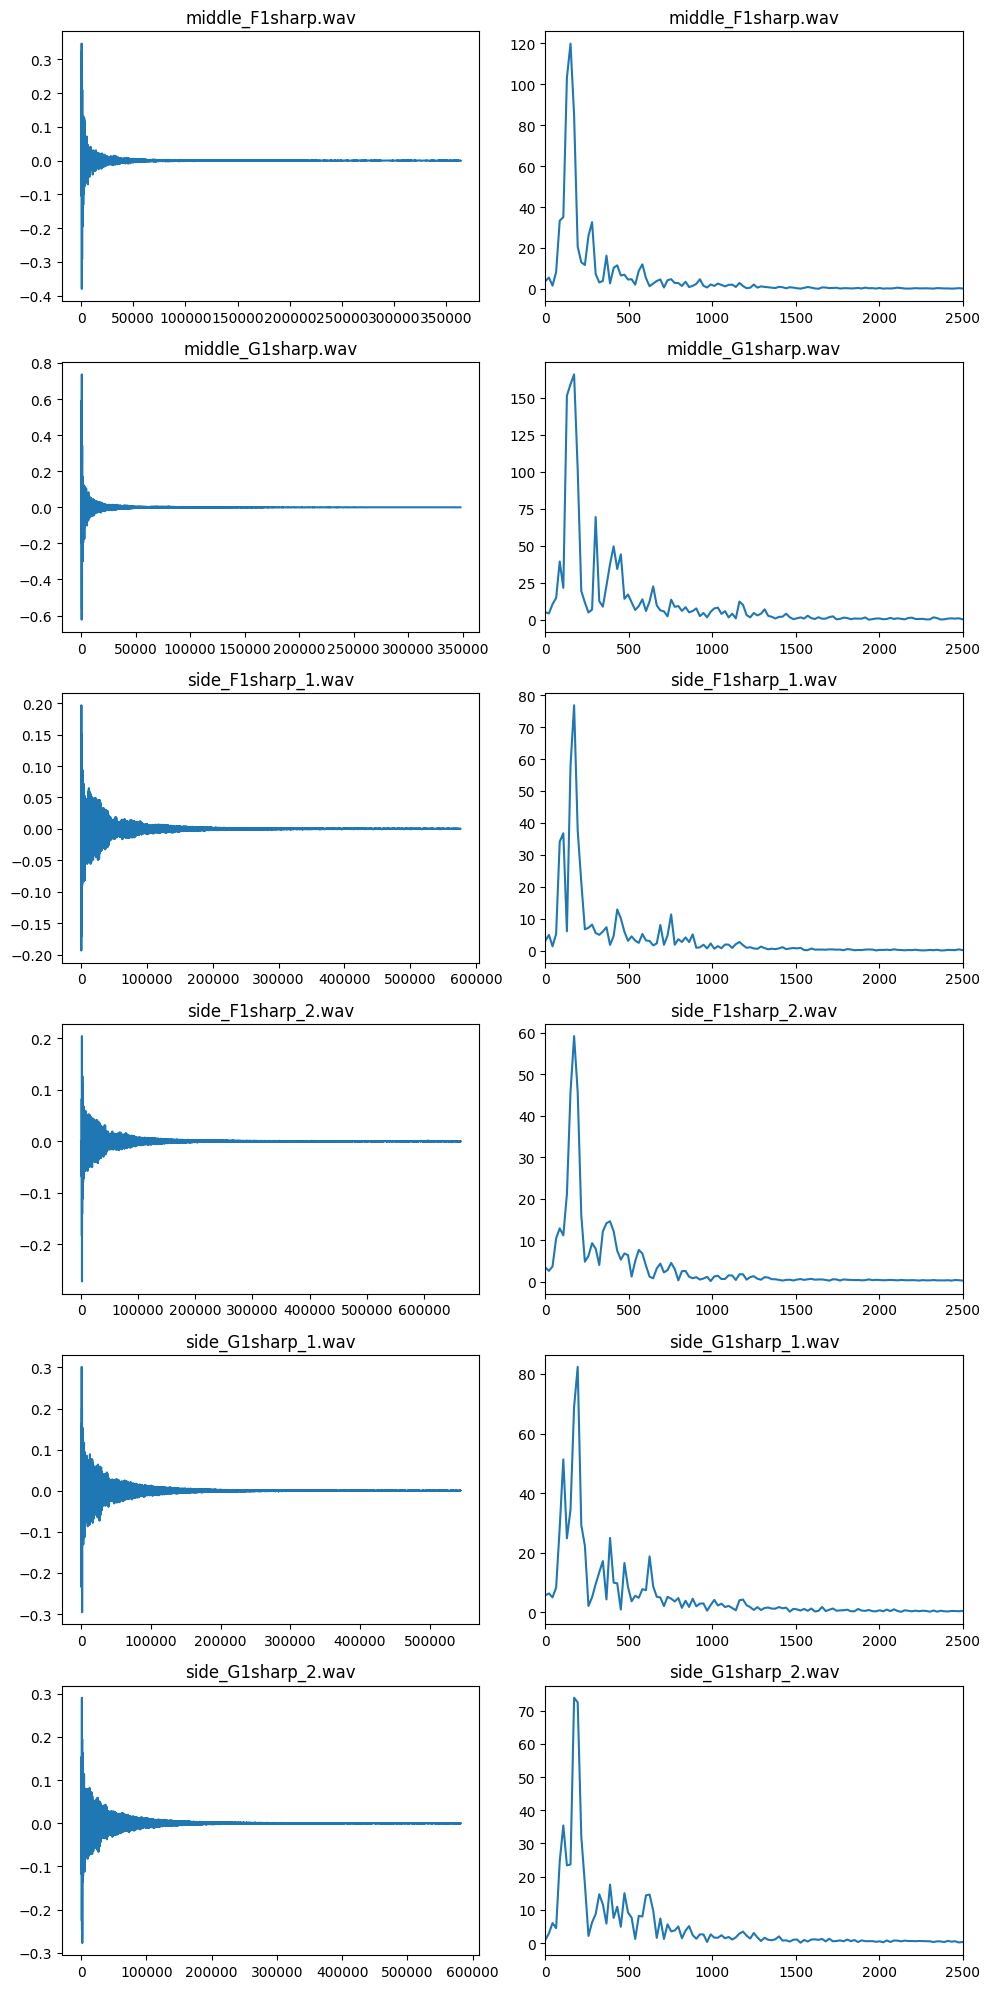

In [20]:
data_folder = 'data/timpani'
file_list = os.listdir(data_folder)

fig, ax = plt.subplots(len(file_list), 2, figsize=(10, 20))
for idx, file in enumerate(file_list):
    data, Fs = sf.read(data_folder + '/' + file)
    data = data[:, 0]
    N_fft = 1024 * 2
    
    X_fft, freqs = mt_fft(data, N_fft, Fs)

    ax[idx, 0].plot(data)
    ax[idx, 0].set_title(file)
    ax[idx, 1].plot(freqs, np.abs(X_fft))
    ax[idx, 1].set_xlim([0, 2500])
    ax[idx, 1].set_title(file)
plt.tight_layout()
plt.show()